<a href="https://colab.research.google.com/github/pingwx/ya.prac/blob/main/03_EDA/03_RU_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Попробуем научиться определять рыночную стоимость объектов. Задача - посмотреть, как на ценообразование влияют различные параметры продаваемых квартир. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Описание данных**
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Изучение данных из файла

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
round((df.isna().mean()*100),2)

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

Обратим внимание, что значительная часть столбцов имеет пропуски. В некоторых столбцах их количество незначительно, и на исследовании не скажется. К этим столбцам относятся `locality_name`, `floors_total`. Несколько столбцов имеют от 10 до 20% пропущенных значений. Выборка при этом все еще остается значительной и пригодной для анализа. В столбцах `parks_nearest`, `ponds_nearest` пропусков больше половины, скорее всего для анализа эти столбцы не подойдут. Столбец `is_apartment` имеет 90% пропусков и, скорее всего, подлежит удалению.

**Остановимся на каждом столбце подробнее**

`total_images` - число фотографий квартиры в объявлении.

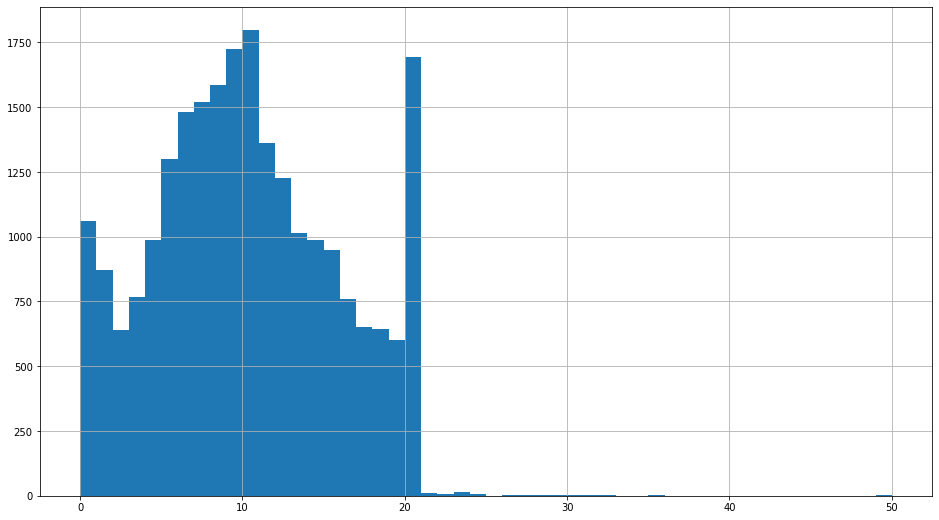

In [5]:
df['total_images'].hist(bins=50, figsize=(16,9));

Здесь мы видим распределение, похожее на нормальное, имеющее, однако, два пика по краям. Это вполне объяснимо. Пик справа связан, скорее всего, с тем, что платформа имеет ограничение на количество загружаемых фотографий, и пользователи стремятся показать объект максимально полно, чтобы увеличить шансы на совершение сделки. Есть незначительное количество объявлений, у которых фотографий загружено больше 20, но, скорее всего, это какие-то особые объекты, для которых ограничение на фотографии расширено. Пик слева тоже понятен, мы имеем дело с "мусорными" объявлениями, где пользователи просто пропустили пункт с загрузкой фото. Если пользователь все-таки перешел к загрузке фото, то, наиболее вероятно, что количество будет лежать недалеко от десяти. Этого количества достаточно для того, чтобы показать объект полным и понятным образом.

`last_price` - цена на момент снятия с публикации.

In [6]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Обратим внимание, что медиана от среднего значения отличается примерно вполовину. Посмотрим на гистограмме, как распределены значения.

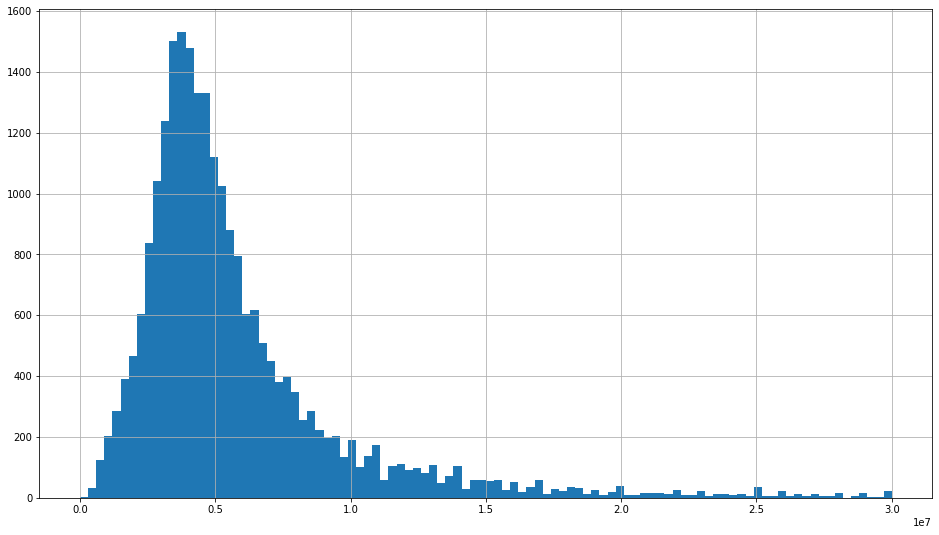

In [7]:
df['last_price'].hist(range=(0,30000000), bins=100, figsize=(16,9));

Видим "хвост" на графике справа, который является причиной отклонения среднего от медианы. Количество объявлений, в которых цена больше 15 млн довольно мало. Отбросим строки с `last_price` больше 15 млн как выбросы.

`total_area` - площадь квартиры в квадратных метрах (м²)

In [8]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

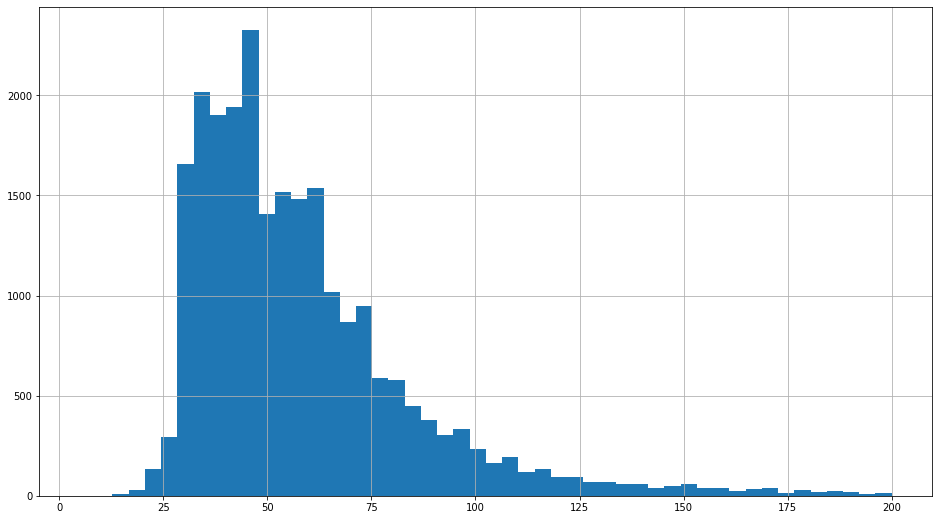

In [9]:
df['total_area'].hist(bins=50,range=(5,200),figsize=(16,9));

Снова видим "хвост". В данном столбце за выбивающиеся примем значения больше 150, которые отбросим. Также видим резкую просадку на значении около 50. Это связано с тем, что большАя часть жилья является типовым. Согласно гуглу, типовое значение площади квартиры в "хрущевке" лежит в диапазоне от 30 до 46м² и просадка, таким образом, хорошо объясняется.

`rooms` - число комнат.

In [10]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Обращаем внимание, что число комнат редко превышает 5. Видим почти 200 строк со значением "0". Посмотрим на них внимательнее.

In [11]:
df[(df['rooms'] == 0)].sort_values(by='total_area',ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19392,5,71000000.0,371.00,2018-07-26T00:00:00,0,3.57,7.0,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0
20082,10,16300000.0,98.40,2017-11-08T00:00:00,0,3.10,5.0,60.50,2,NaN,...,NaN,NaN,Санкт-Петербург,26972.0,5819.0,0.0,NaN,1.0,674.0,537.0
3458,6,7400000.0,73.60,2017-05-18T00:00:00,0,NaN,3.0,50.00,1,NaN,...,NaN,0.0,Санкт-Петербург,26581.0,6085.0,0.0,NaN,1.0,348.0,60.0
21227,0,8200000.0,71.00,2017-07-21T00:00:00,0,5.80,5.0,68.00,5,NaN,...,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
13613,16,8100000.0,58.40,2019-04-26T00:00:00,0,3.30,7.0,33.00,6,NaN,...,NaN,NaN,Санкт-Петербург,14509.0,8288.0,0.0,NaN,0.0,NaN,NaN
10008,20,5050000.0,44.20,2017-09-14T00:00:00,0,2.70,9.0,32.20,1,NaN,...,NaN,NaN,Санкт-Петербург,24329.0,5955.0,0.0,NaN,2.0,520.0,69.0
15319,4,5970000.0,43.30,2017-07-20T00:00:00,0,2.80,9.0,28.20,2,NaN,...,NaN,2.0,Санкт-Петербург,23617.0,5223.0,0.0,NaN,1.0,874.0,30.0
7237,8,2999000.0,42.63,2017-11-27T00:00:00,0,NaN,16.0,25.70,2,NaN,...,NaN,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16130,14,5000000.0,42.10,2018-04-13T00:00:00,0,NaN,20.0,30.00,10,NaN,...,NaN,NaN,Санкт-Петербург,50605.0,15933.0,0.0,NaN,0.0,NaN,170.0
9052,12,3890000.0,38.30,2017-10-06T00:00:00,0,2.70,14.0,24.42,7,NaN,...,NaN,2.0,Санкт-Петербург,15493.0,14289.0,0.0,NaN,0.0,NaN,289.0


Отсортировав строки по площади, мы видим, что, объекты со значением комнат "0" почти все скромные по площади. Либо значение числа комнат было пропущено на этапе создания объявлений, либо авторы объявления сознательно ставили "0", чтобы показать, что квартира - студия. В любом случае, нет особой разницы, будем ли мы считать нули пропусками или настоящими значениями, на исследовании сказаться не должно.

`ceiling_height` - высота потолков (м)

In [12]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

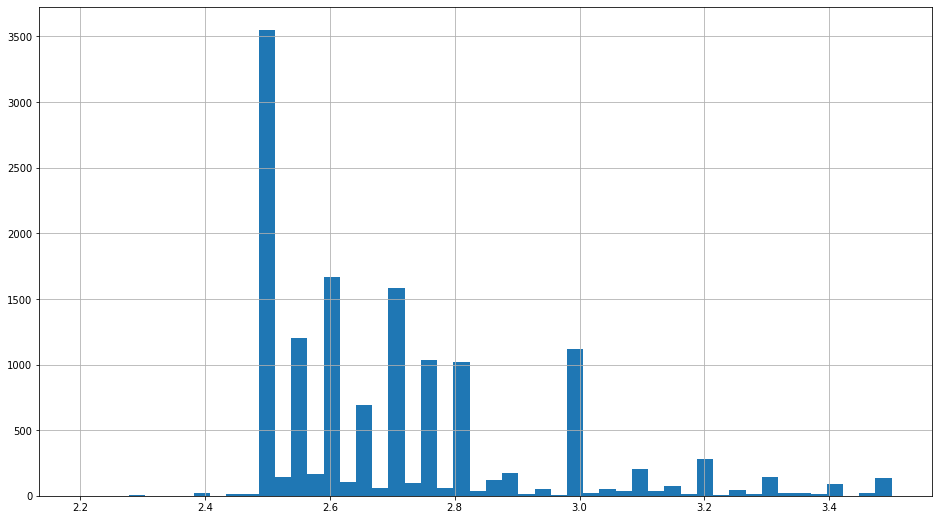

In [13]:
df['ceiling_height'].hist(bins=50,range=(2.2,3.5),figsize=(16,9));

На этой гистограмме мы видим, что значение высоты потолка чаще всего округлено до десятых долей метра, значения с двумя знаками после запятой редки. Наиболее частое значение - 2.5, значения больше 3.2 редки.

In [14]:
df['ceiling_height'].isna().sum()

9195

Существенная часть значений пропущена. Для ответов на вопросы, данных в инструкциях к проекту, пропуски в этом столбце ни на что не влияют, однако убрать их мы можем. Для этого будем группировать таблицу по этажности дома `floors_total` и заменим пропущенные значения высот потолков `ceiling_height` на медиану для каждой этажности. Таким образом пропуски будут заменены достаточно точно.

`floors_total` — всего этажей в доме

In [15]:
df['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64

In [16]:
df['floors_total'].isna().sum()

86

В этом столбце аномалий практически нет. 86 пропусков могут повлиять только на категоризацию этажей, на которых расположены квартиры ("первый", "последний", "другой"), однако, с первыми этажами у нас и так нет проблем, а если этаж отличается от первого, мы редко ошибемся, объявляя категорию "другой", поскольку квартир, находящихся на "непоследнем" этаже подавляющее большинство.

`living_area` — жилая площадь в квадратных метрах (м²)

In [17]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

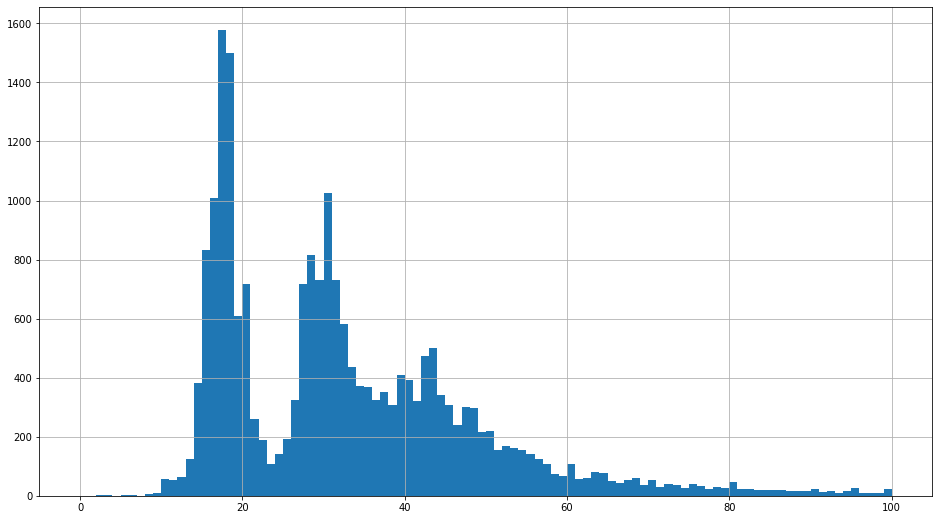

In [18]:
df['living_area'].hist(bins=100, grid=True, range=(0, 100), figsize=(16, 9));

Данная гистограмма очень показательна! Мы видим три пика, которые, вероятнее всего, соотвествуют просто количеству комнат! Первый пик соответствует однокомнатным квартирам, "жилая" комната в них почти всегда одинакового размера. "Провал" на значениях около 25 легко объясняется тем, что для однакомнатных это значение - слишком большое, а для "двушек" - слишком маленькое. Пик на 30 соответствует типичной двушке в хрушевке. С 35 по 50 гистограмма "размазана" и это тоже легко объясняется тем, что сочетаний площадей двух или трех комнат уже может быть достаточно много.

In [19]:
df['living_area'].isna().sum()

1903

Пропуски в этом столбце оставим как есть. Заполняя их медианным значением, либо каким-то другим, мы рискуем исказить реальную картину.

`floor` — этаж.

In [20]:
df['floor'].value_counts()

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: floor, dtype: int64

В этом столбце аномалий не наблюдаем.

`is_apartment` — апартаменты (булев тип)

In [21]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [22]:
df['is_apartment'].isna().sum()

20924

Мало того, что пропущена подавляющая часть значений, строк с `true` всего 50 штук, что для нашего датасета по сути является выбросом. Просто удалим этот столбец.

`studio` — квартира-студия (булев тип)

In [23]:
df['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

Еще один бесполезный столбец, в котором `True` - выброс, так же удалим его за ненадобностью.

`open_plan` - свободная планировка (булев тип)

In [24]:
df['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

Аналогичная картина. Никаких объективных выводов по такому количеству `True` мы сделать не можем, а датафрейм захламлен лишним столбцом, уберем его.

`kitchen_area` — площадь кухни в квадратных метрах (м²)

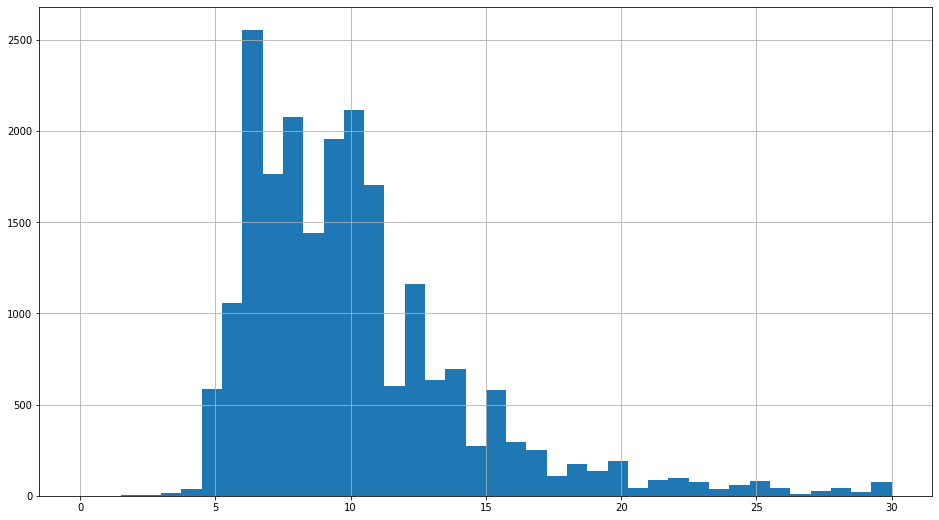

In [25]:
df['kitchen_area'].hist(bins=40, range=(0, 30), figsize=(16,9));

Видим весьма неоднородную гистограмму, на которой пики снова скорее скорее всего соответствуют каким-то типовым значениям.

In [26]:
df['kitchen_area'].isna().sum()

2278

По аналогии с `living_area` видимо 10% пропусков, которые так же хотим оставить, как они есть.

`balcony` — число балконов

In [27]:
df['balcony'].value_counts(dropna=False)

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Пропуски заменим нулями.

`locality_name` — название населённого пункта

In [28]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [29]:
df['locality_name'].isna().sum()

49

Видим немного пропусков, поскольку по заданию нам надо будет рассмотреть 10 наиболее часто встречающихся населенных пунктов, а остальные пометить категорией "другие", то пропуски попадут туда. Ничего страшного.

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

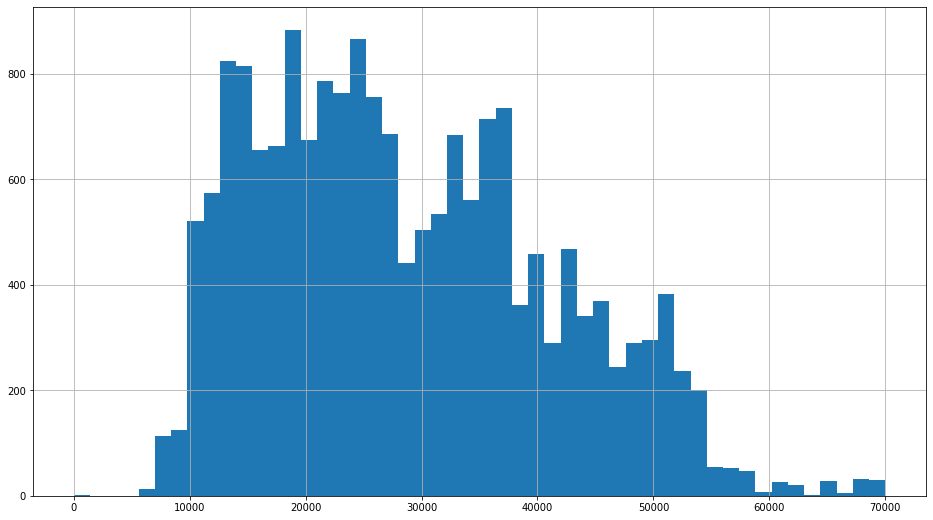

In [30]:
df['airports_nearest'].hist(bins=50, range=(0, 70000), figsize=(16, 9));

In [31]:
df['airports_nearest'].isna().sum()

5542

Мы снова видим неоднородную гистограмму, что вполне объяснимо тем, что насленные пункты (и жилье в них, соответственно) расположены неравномерно по карте, таким образом какие-то значения расстояний встречаются чаще других. Пропусков довольно много, будем работать с тем, что есть.

`cityCenters_nearest` - расстояние до центра города (м)

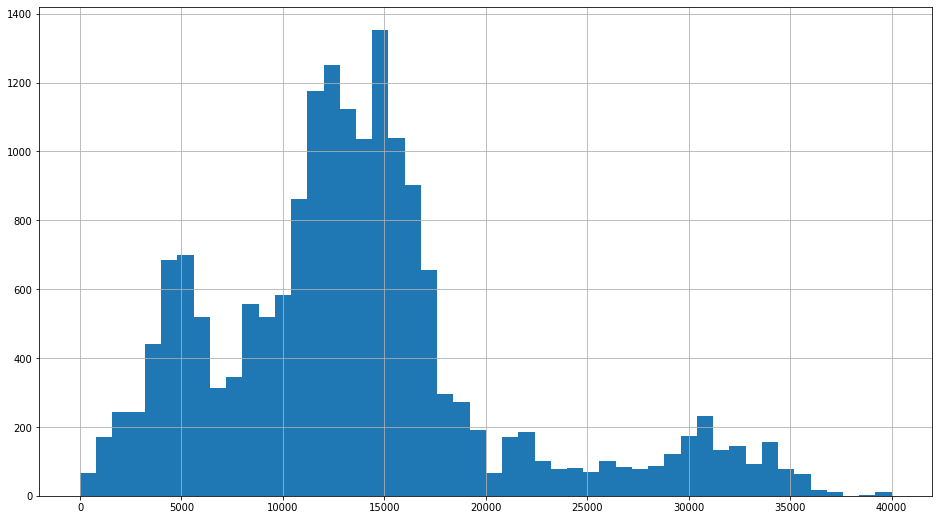

In [32]:
df['cityCenters_nearest'].hist(bins=50, range=(0, 40000), figsize=(16, 9));

In [33]:
df['cityCenters_nearest'].isna().sum()

5519

Вид гистограммы и количество пропусков похожи на предыдущий столбец.

`parks_around3000` — число парков в радиусе 3 км

In [34]:
df['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [35]:
df['parks_around3000'].isna().sum()

5518

С пропусками поступим следующим образом: будем анализировать столбец `parks_nearest`. Если в обоих столбцах пропуск, пропуск в `parks_around3000` заменяем на 0. Если в `parks_nearest` значение меньше 3000, то `parks_around3000` заменяем на 1. Предполагаем, что, как и в случае с балконами, если на месте значения пропуск, скорее всего парков нет.

`parks_nearest` — расстояние до ближайшего парка (м)

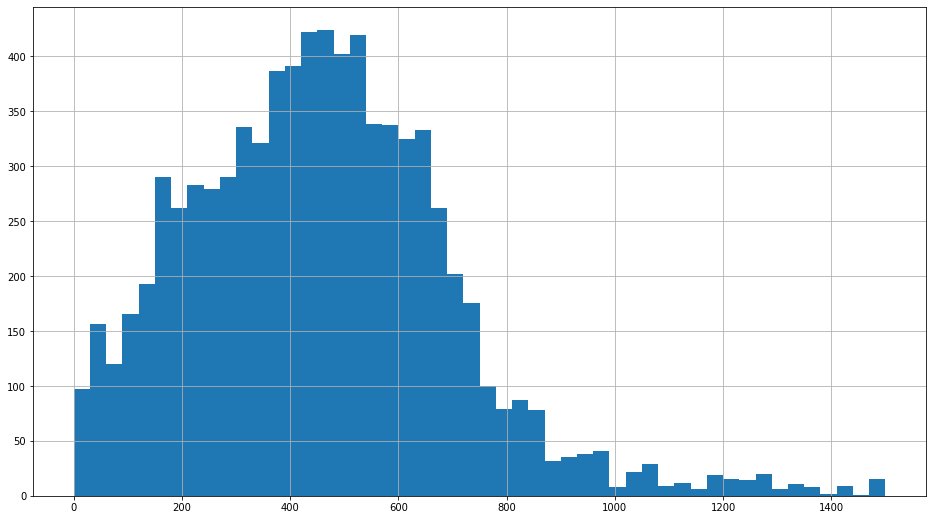

In [36]:
df['parks_nearest'].hist(bins=50, range=(0, 1500), figsize=(16, 9));

In [37]:
df['parks_nearest'].isna().sum()

15620

Здесь пропусков очень много и заменить их каким-то адекватным значением не получится.

`parks_around3000` — число парков в радиусе 3 км

In [38]:
df['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [39]:
df['ponds_around3000'].isna().sum()

5518

Все по аналогии с парками, добавить нечего.

`ponds_around3000` — число водоёмов в радиусе 3 км

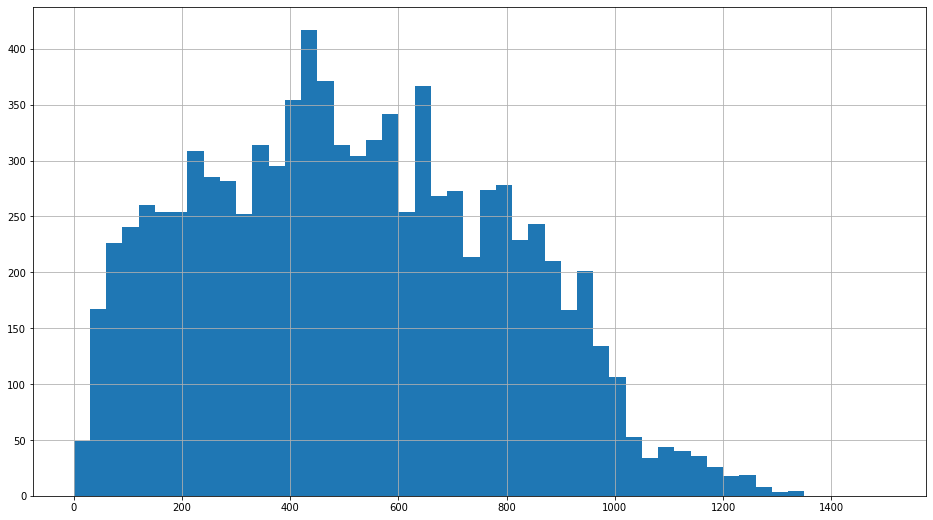

In [40]:
df['ponds_nearest'].hist(bins=50, range=(0, 1500), figsize=(16, 9));

In [41]:
df['ponds_nearest'].isna().sum()

14589

Так же столбец очень похож на `parks_nearest`.

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

In [42]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

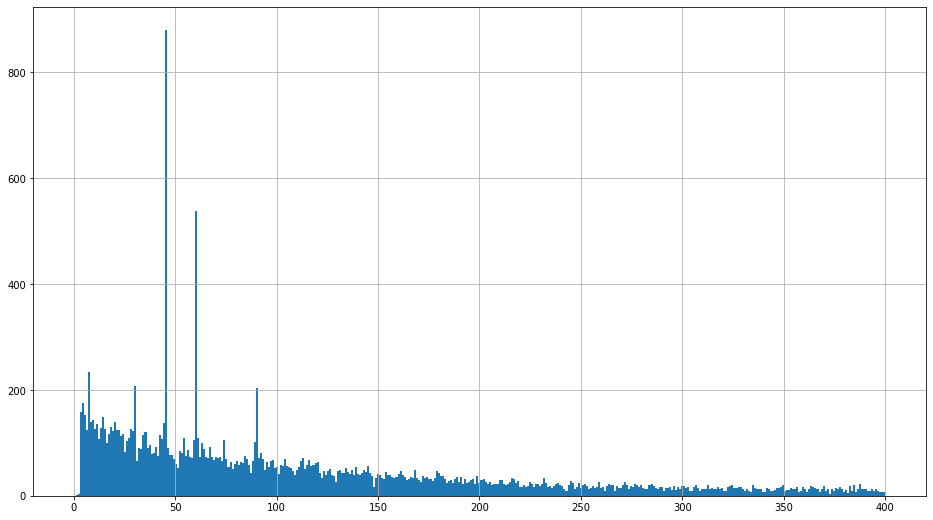

In [43]:
df['days_exposition'].hist(bins=401, range=(0, 400), figsize=(16, 9));

In [44]:
df['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1021.0      1
1362.0      1
1105.0      1
795.0       1
971.0       1
Name: days_exposition, Length: 1141, dtype: int64

In [45]:
df['days_exposition'].isna().sum()

3181

На этой гистограмме мы видим несколько пиков на значениях 7, 30, 45, 60, 90. Возможно, каким-то образом связано с особенностями платформы, на которой объявления размещены, и снятия объявления в этом случае не всегда означает факт продажи. "Хвост" гистограммы снова длинный и тут снова придется отбрасывать значения. Разумным будет ограничиться одним годом. Отметим также, что среднее от медианы в этом столбце отличается почти в 2 раза. Медианное значение времени продажи - 95 дней, среднее - 181.

### Вывод

Кратко перечислим дальнейшие действия по предобработке:

1. Удаляем из датафрейма столбцы `is_apartment`, `studio`, `open_plan`.
2. Заменим тип столбца `first_day_exposition` на datetime
3. Пропуски в `ceiling_height` заполним, сгруппируя датафрейм по `floors_total`, взяв для каждой группы медиану.
4. Пропуски в `balcony` заменим на 0
5. Пропуски в `ponds_around3000`, `parks_around3000` заменим, проанализировав столбцы `ponds_nearest` и `parks_nearest` соответственно.
6. Сделаем категоризацию по `locality_name`, возьмем 10 наиболее часто встречающихся населенных пунктов, а остальные отправим в категорию "Другое", назовем столбец `locality_category`
7. Добавим в таблицу столбцы: цена квадратного метра `price_per_meter`, день недели `weekday`, месяц `month`, год `year`, соотношение жилой и общей площади `living_to_total`, соотношение площади кухни к общей `kitchen_to_total`. Добавим стообец с категоризацией этажей `floor_category` (первый, последний, другой)
8. Удалим из датафрейма редкие и выбивающиеся значения. `last_price` > 15000000, `total_area` > 150, `days_exposition` > 365.


## Предобработка данных

Выкинем столбцы `is_apartment`, `studio`, `open_plan`.

In [46]:
df.drop(['is_apartment', 'studio', 'open_plan'], axis=1, inplace=True)

Заменим тип столбца `first_day_exposition` на datetime

In [47]:
try:
    df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],
                                                format='%Y-%m-%dT%H:%M:%S')
    print('поменяли тип данных на datetime!')
except:
    print('что-то пошло не так!')

поменяли тип данных на datetime!


Заполним пропуски в `ceiling_height`. Для каждого уникального значения из `floors_total`, возьмем медиану высоты потолка и заполним ей пропуски.

In [48]:
for floor in df['floors_total'].unique():
    ceiling_median = df[df['floors_total'] == floor]['ceiling_height'].median()
    df.loc[(df['floors_total'] == floor) & (df['ceiling_height'].isna()),
           'ceiling_height'] = ceiling_median

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Получили предупреждение, что для некоторых значений `floors_total` посчитать медиану не смогли, потому что считаем по пустому срезу. Для этих ситуаций переменная ceiling_median приняла значение np.nanmean, и значение `ceiling_height` по-прежнему пропущено.

In [49]:
df['ceiling_height'].isna().sum()

78

Заменим пропуски в `balcony` нулями, поскольку, если количество балконов не указано, то скорее всего их нет.

In [50]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

Заменим пропуски в `parks_around3000` и `ponds_around3000` по логике, аналогичной столбцу `balcony`, однако проанализируем дополнительно соответствующие столбцы `_nearest`. Если значение в `_nearest` указано и меньше 3000, то пропуск следует заменить на "1" поскольку парк или водоем таки есть.

In [51]:
df.loc[(df['parks_around3000'].isna()) & (df['parks_nearest'] < 3000),
       'parks_around3000'] = 1
df.loc[(df['parks_around3000'].isna()) & (df['parks_nearest'].isna()),
       'parks_around3000'] = 0
df.loc[(df['ponds_around3000'].isna()) & (df['ponds_nearest'] < 3000),
       'ponds_around3000'] = 1
df.loc[(df['ponds_around3000'].isna()) & (df['ponds_nearest'].isna()),
       'ponds_around3000'] = 0

In [52]:
df['parks_around3000'].isna().sum()

0

In [53]:
df['ponds_around3000'].isna().sum()

0

В `parks_around3000` и `ponds_around3000` пропусков больше нет!

**Вывод:** удалили "мусорные" столбцы, привели к datetime столбец `first_day_exposition`. Заполнили пропуски, где это уместно

## Расчёты и добавление результатов в таблицу

Добавим в таблицу столбец `locality_category`, в который для топ 10 наиболее часто встречающихся населенных пунктов присвоим значение столбца `locality_name`, а для остальных - значение "Другое"

In [54]:
#список 10 наиболее часто встречающихся значений locality_name
top_10_list = df['locality_name'].value_counts().head(10).index
#функция, которая, в зависимости от входного значения, 
#возвращает либо это значение, если оно есть в топ10,
# либо "Другое", если его там нет
def locality_category(locality): 
    if locality in top_10_list:  
        return locality
    else:
        return 'Другое'
#добавляем столбец в датафрейм
df['locality_category'] = df['locality_name'].apply(locality_category) 

In [55]:
df['locality_category'].value_counts()

Санкт-Петербург      15721
Другое                4741
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_category, dtype: int64

Получили то, что хотели!

Добавим столбцы `weekday`, `month`, `year`, в которых соответственно будут храниться значения дня недели, месяца и года, когда было размещено объявление.

In [56]:
df['weekday'] = df['first_day_exposition'].dt.day_name() #день недели
df['month'] = df['first_day_exposition'].dt.month_name() #месяц
df['year'] = df['first_day_exposition'].dt.year #год

Добавим в таблицу столбец `floor_category` с категоризацией для этажей. Варианты: "первый", "последний", "другой"

In [57]:
 #фунция категоризации этажей с 2 входными параметрами:
 #этаж квартиры и общее число этажей
def floor_category(floor, floors_total): 
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
df['floor_category'] = df.apply(
    lambda x: floor_category(x.floor, x.floors_total), axis=1) #добавили столбец
df['floor_category'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_category, dtype: int64

Добавим столбец `price_per_meter`, в котором посчитаем цену за квадратный метр.

In [58]:
df['price_per_meter'] = df['last_price'] / df['total_area']

Добавим столбцы `living_to_total` и `kitchen_to_total`, в которых расчитаем соответственно соотношение жилой площади к общей и площади кухни к общей.

In [59]:
df['living_to_total'] = df['living_area'] / df['total_area']
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']

Добавим в таблицу столбец `dist_to_center_km`, в котором значения столбца `cityCenters_nearest` округлим до километров.

In [60]:
df['dist_to_center_km'] = round(df['cityCenters_nearest'] / 1000)

Уберем редкие и выбивающиеся значения. Ранее мы определили их так: цена выше 15 млн, площадь более 150м2, длительность продаже более 365 дней.

In [61]:
df = df.query(
    'last_price <= 15000000 and total_area <=150 and days_exposition <= 365').reset_index(drop=True)

Наконец, посмотрим, есть ли в таблице дубликаты.

In [62]:
df.duplicated().sum()

0

Посмотрим еще раз на итоговый датафрейм

In [63]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,days_exposition,locality_category,weekday,month,year,floor_category,price_per_meter,living_to_total,kitchen_to_total,dist_to_center_km
0,7,3350000.0,40.40,2018-12-04,1,2.75,11.0,18.60,1,11.00,...,81.0,посёлок Шушары,Tuesday,December,2018,первый,82920.792079,0.460396,0.272277,19.0
1,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,41.00,...,121.0,Санкт-Петербург,Tuesday,June,2018,другой,100000.000000,0.320000,0.410000,8.0
2,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,9.10,...,55.0,Другое,Monday,September,2018,другой,95065.789474,0.473684,0.299342,NaN
3,6,3700000.0,37.30,2017-11-02,1,2.66,26.0,10.60,6,14.40,...,155.0,посёлок Парголово,Thursday,November,2017,другой,99195.710456,0.284182,0.386059,19.0
4,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,8.81,...,189.0,посёлок Мурино,Wednesday,May,2018,другой,87454.764777,0.465320,0.265682,NaN
5,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,6.50,...,289.0,Санкт-Петербург,Sunday,February,2017,другой,88524.590164,0.714754,0.106557,15.0
6,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,8.50,...,137.0,Санкт-Петербург,Thursday,November,2017,другой,127525.252525,0.512626,0.214646,14.0
7,9,3300000.0,44.00,2018-08-27,2,2.55,5.0,31.00,4,6.00,...,7.0,Другое,Monday,August,2018,другой,75000.000000,0.704545,0.136364,52.0
8,10,3890000.0,54.00,2016-06-30,2,2.55,5.0,30.00,5,9.00,...,90.0,Другое,Thursday,June,2016,последний,72037.037037,0.555556,0.166667,NaN
9,1,4400000.0,36.00,2016-06-23,1,3.00,6.0,17.00,1,8.00,...,203.0,Пушкин,Thursday,June,2016,первый,122222.222222,0.472222,0.222222,31.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16812 entries, 0 to 16811
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          16812 non-null  int64         
 1   last_price            16812 non-null  float64       
 2   total_area            16812 non-null  float64       
 3   first_day_exposition  16812 non-null  datetime64[ns]
 4   rooms                 16812 non-null  int64         
 5   ceiling_height        16749 non-null  float64       
 6   floors_total          16747 non-null  float64       
 7   living_area           15354 non-null  float64       
 8   floor                 16812 non-null  int64         
 9   kitchen_area          15012 non-null  float64       
 10  balcony               16812 non-null  float64       
 11  locality_name         16776 non-null  object        
 12  airports_nearest      12813 non-null  float64       
 13  cityCenters_near

**Вывод:** сделали необходимые по заданию расчеты, категоризировали данные, убрали из датафрейма выбросы.

## Исследовательский анализ данных

Постараемся изучить, какие факторы влияют на стоимость квартиры. Для начала посмотрим на очевидное: зависимость цены квартиры от ее площади.

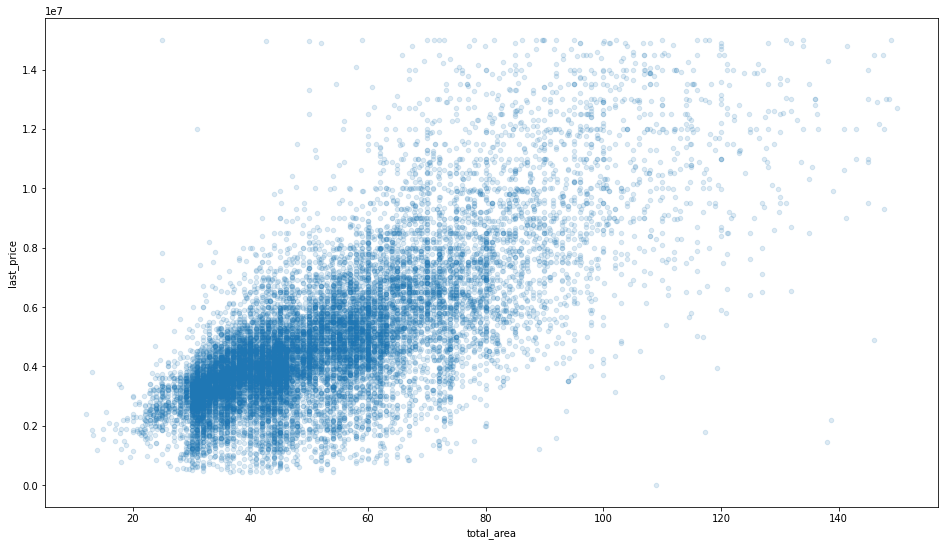

In [65]:
df.plot(x='total_area', y='last_price',
        kind='scatter', figsize=(16, 9), alpha=0.15);
#диаграмма рассеяния, по х - общая площадь, по у - цена квартиры

Ничего удивительного мы здесь не видим. Чем больше площадь квартиры, тем она дороже. Отметим, что значения цены за квадратный метр представляет для нас не меньше интереса, чем общая цена.  Рассмотрим, как ведет себя показатель цены за квадратный метр в зависимости от площади.

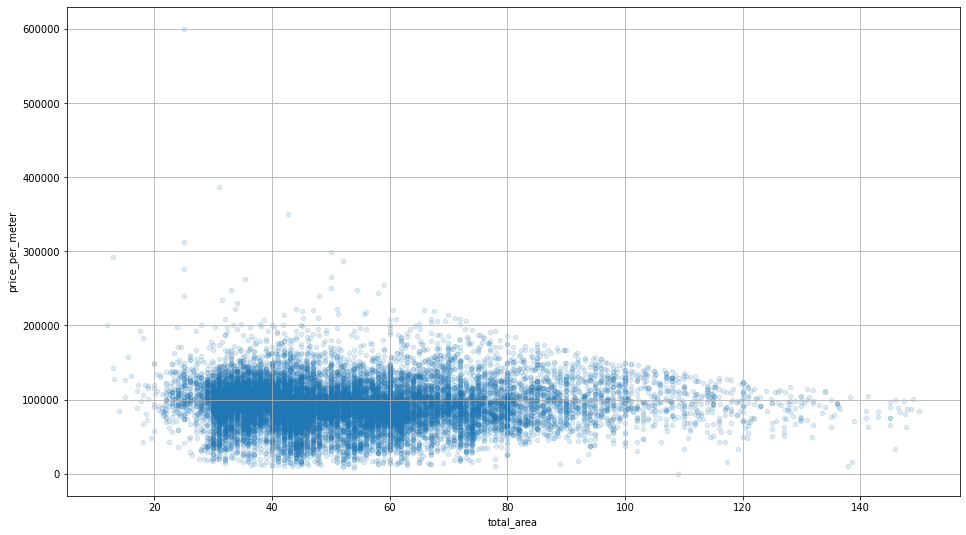

In [66]:
df.plot(x='total_area', y='price_per_meter',
        kind='scatter', figsize=(16, 9), alpha=0.15, grid=True);
#диаграмма рассеяния, по х - общая площадь, по у - цена за метр

Здесь уже не все так однозначно. Если зависимость цены за квадратный метр от общей площади и есть, на этой диаграмме это не видно. Теперь посмотрим, как количество комнат влияет на общую цену и на цену за метр.

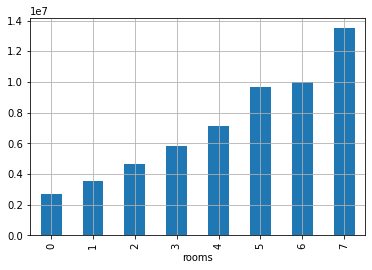

In [67]:
df.pivot_table(index='rooms', values='last_price',
               aggfunc=['median']).plot(kind='bar', grid=True, legend=False);
#по х - количество комнат, по у - медианное значение итоговой цены

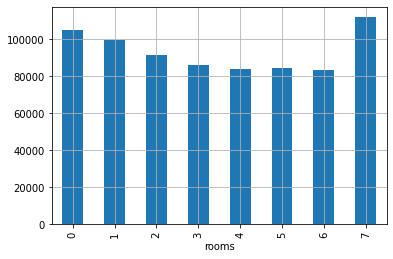

In [68]:
df.pivot_table(index='rooms', values='price_per_meter',
               aggfunc=['median']).plot(kind='bar', grid=True, legend=False);
#по х - количество комнат, по у - медианное значение цены за квадратный метр

In [69]:
df['rooms'].value_counts()

1    6359
2    5890
3    3722
4     569
0     169
5      93
6       7
7       3
Name: rooms, dtype: int64

По графикам видно, что итоговая цена квартиры зависит от количества комнат, но, как и в случае с площадью, это очевидное наблюдение. А вот цена за метр судя по всему снижается с ростом числа комнат. Это явно видно для числа комнат 1-3, для остальных значений у нас маленькая выборка, чтобы сделать однозначный вывод.

Посмотрим, как менялось медианной значение итоговой цены и цены за метр по годам.

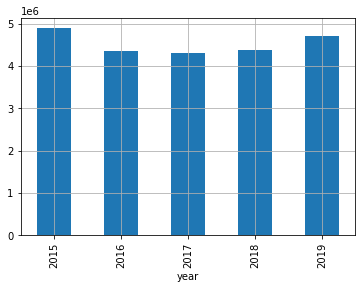

In [70]:
df.pivot_table(index='year', values='last_price',
               aggfunc=['median']).plot(kind='bar', grid=True, legend=False);
#по х - год объявления, по у - медианное значение итоговой цены

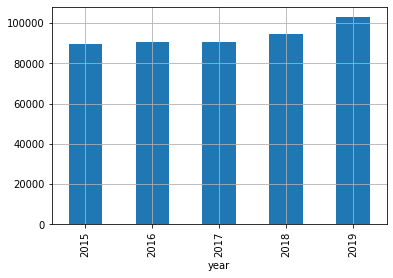

In [71]:
df.pivot_table(index='year', values='price_per_meter',
               aggfunc=['median']).plot(kind='bar', grid=True, legend=False);
#по х - год объявления, по у - медианное значение цены за метр

Медианное значение цены за метр растет от года к году. Медианное значение итоговой цены было максимальным в 2015 году, затем просело и снова начало расти. Такое может быть, если с увеличением года уменьшается средняя площадь продаваемых квартир. Ради интереса, проверим это рассуждение.

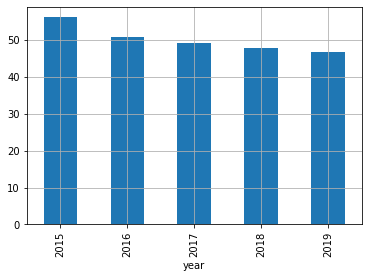

In [72]:
df.pivot_table(index='year', values='total_area',
               aggfunc=['median']).plot(kind='bar', grid=True, legend=False);
#по х - год объявления, по у - общая площадь квартиры

За 5 лет медианная площадь продаваемых квартир уменшилась на десять метров. С годами люди покупают жилье меньшей площади.

Посмотрим, как влияют значения цены в зависимости от месяца и дня недели размещения объявления

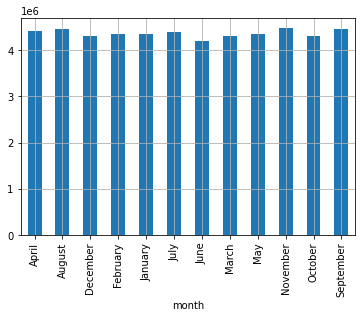

In [73]:
df.pivot_table(index='month', values='last_price',
               aggfunc=['median']).plot(kind='bar', grid=True, legend=False);
#по х - месяц, по у - итоговоая цена

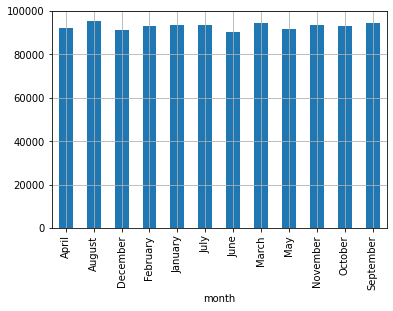

In [74]:
df.pivot_table(index='month', values='price_per_meter',
               aggfunc=['median']).plot(kind='bar', grid=True, legend=False);
#по х - месяц, по у - цена за метр

На этих графиках ничего особо интересного не видно, разброс цен по месяцам незначительный.

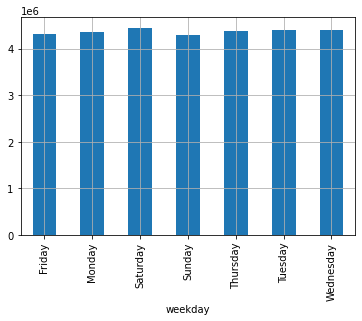

In [75]:
df.pivot_table(index='weekday', values='last_price',
               aggfunc=['median']).plot(kind='bar', grid=True, legend=False);
#по х - день недели, по у - итоговоая цена

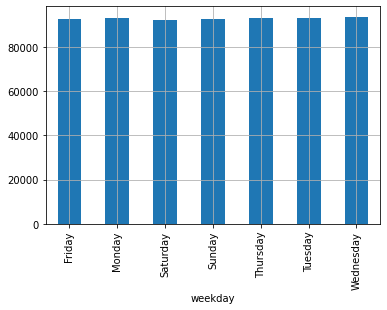

In [76]:
df.pivot_table(index='weekday', values='price_per_meter',
               aggfunc=['median']).plot(kind='bar', grid=True, legend=False);
#по х - день недели, по у - цена за метр

Делаем вывод, что день и месяц размещения объявления не влияют на цены.

Посмотрим, как влияет удаленность от центра на итоговую цену и цену за метр

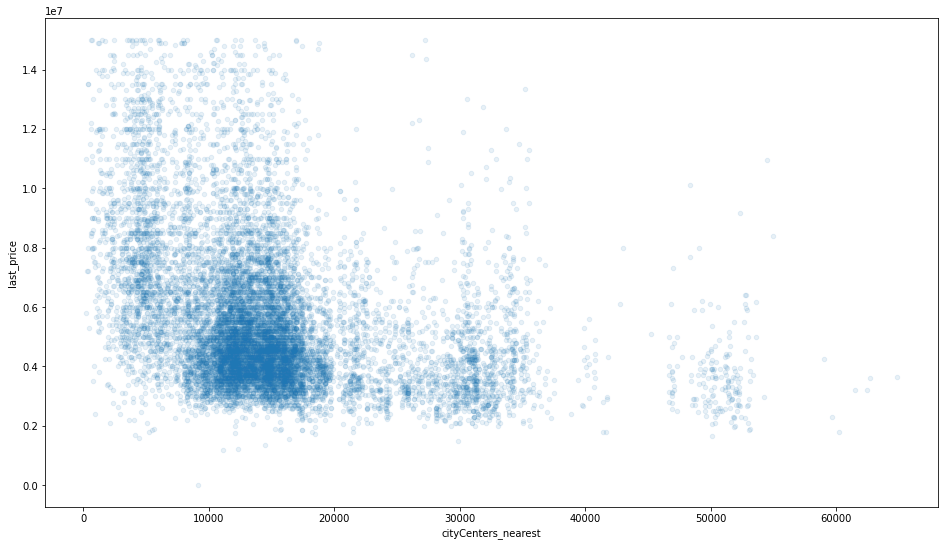

In [77]:
df.plot(x='cityCenters_nearest', y='last_price',
        kind='scatter', figsize=(16, 9), alpha=0.1);
#диаграмма рассеяния, по х - расстояние до центра, по у - цена квартиры

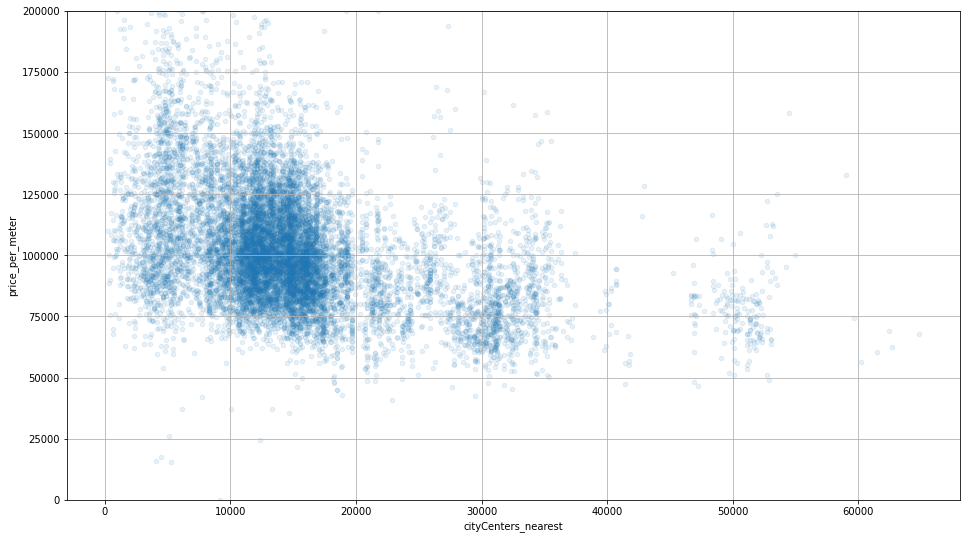

In [78]:
df.plot(x='cityCenters_nearest', y='price_per_meter',
        kind='scatter', ylim=(0,200000), figsize=(16, 9), alpha=0.1, grid=True);
#диаграмма рассеяния, по х - расстояние до центра, по у - цена за метр

По этим диаграммам рассеяния однозначно видно, что чем ближе квартира у центру, тем выше ее общая цена и цена за метр, что тоже вполне ожидаемо. Посмотрим, как влияет этаж, на котором расположена квартира, на итоговую цену и цену за метр.

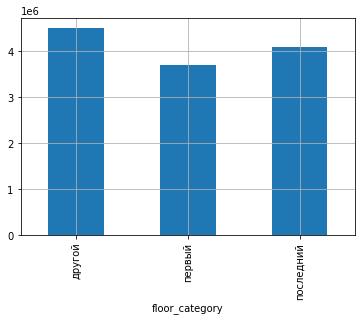

In [79]:
df.pivot_table(index='floor_category', values='last_price',
               aggfunc=['median']).plot(kind='bar', grid=True, legend=False);
#по х - этаж, по у - итоговая цена

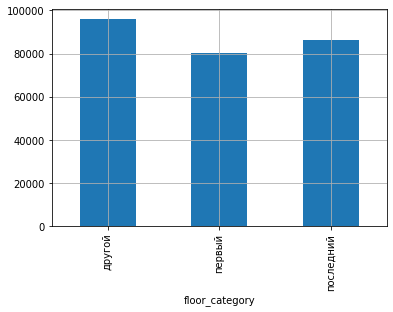

In [80]:
df.pivot_table(index='floor_category', values='price_per_meter',
               aggfunc=['median']).plot(kind='bar', grid=True, legend=False);
#по х - этаж, по у - цена за метр

Как видно из графиков, нахождение квартиры на первом и последнем этажах отрицательно влияет на ее цену. Первый этаж хуже, чем последний.

Рассмотрим десять населенных пунктов с наибольшим числом объявлений. Остальные отнесем в категорию "Другое". Посмотрим на среднюю цену квадратного метра.

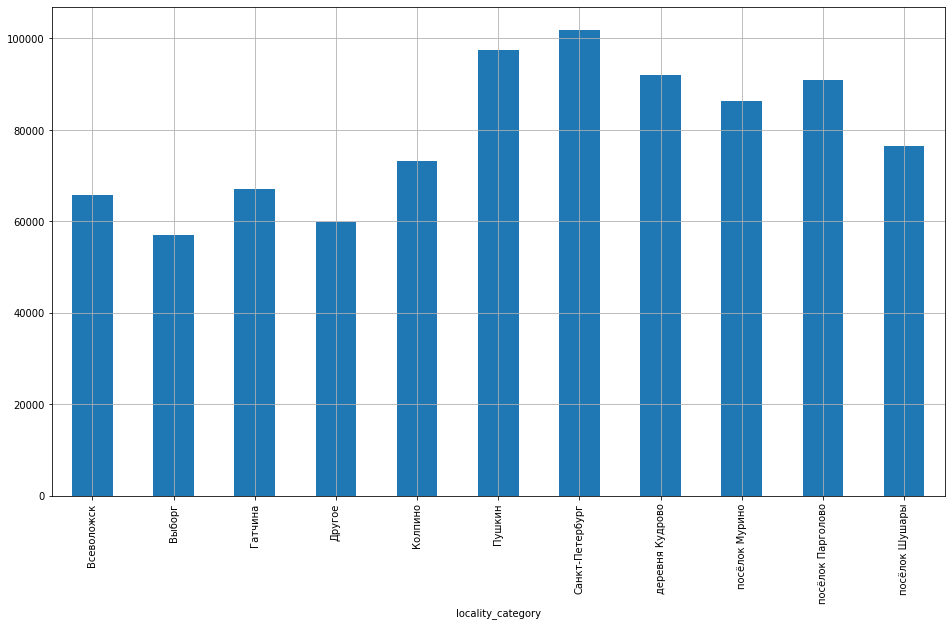

In [81]:
df.pivot_table(index='locality_category', values='price_per_meter',
               aggfunc=['median']).plot(kind='bar', grid=True,
                                        figsize=(16, 9), legend=False)
#по х - название населенного пункта, по у - цена за метр

In [82]:
df.pivot_table(index='locality_name',
               values='price_per_meter',
               aggfunc=['mean', 'count']).sort_values(by=(
                   'count','price_per_meter'), ascending=False).head(10)


,mean,count
,price_per_meter,price_per_meter
locality_name,,
Санкт-Петербург,105929.738662,10944
посёлок Мурино,86187.967728,463
посёлок Шушары,78291.391704,363
Всеволожск,67206.701563,284
Колпино,74504.204860,274
посёлок Парголово,89081.056158,262
деревня Кудрово,92682.690945,259
Пушкин,100287.421764,254


Ожидаемо, цена в Санкт-Петербурге выше, чем в области. На втором месте - Пушкин. Хотя он географически находится дальше, чем, Шушары, цена за метр в нем выше. Предположим, что в Шушарах на цену негативно влияет близость аэропорта. В категории "Другое" цена за метр почти самая низкая. Это тоже ожидаемо, т.к. в ней находятся все небольшие населенные пункты.

Более детально остановимся на Санкт-Петербурге. Построим график зависимости цены за метр от удаленности от центра, округленной до целых километров.

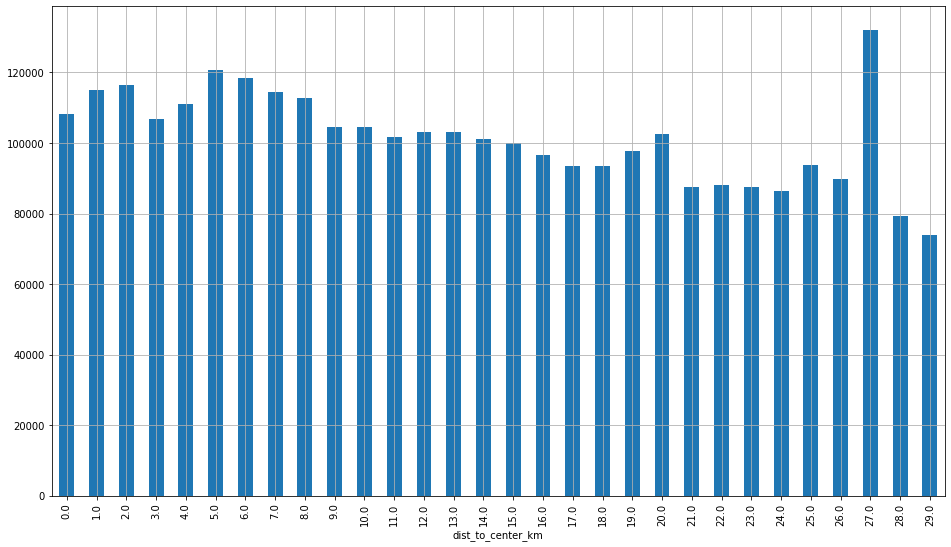

In [83]:
df[df['locality_name'] == 'Санкт-Петербург'].pivot_table(
    index='dist_to_center_km', values='price_per_meter',
    aggfunc=['median']).plot(kind='bar', 
                             grid=True, figsize=(16, 9), legend=False);

За центр возьмем область, ограниченную восемью километрами, поскольку из графика выше видно, что на этом значении у цены за метр наиболее резкий провал. Пик на значении 27 является выбросом. Остановимся более подробно на центральной зоне. Для нее проанализируем значения площади, цены, числа комнат и и высоты потолков. Методом describe() выведем последовательно значения для всей базы и значения для центра. Сравним их.

In [84]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,16812.000000,1.681200e+04,16812.000000,16749.000000
mean,53.297671,4.959140e+06,1.909886,2.709467
std,19.646829,2.514068e+06,0.909977,1.035845
min,12.000000,1.219000e+04,0.000000,1.000000
25%,38.600000,3.300000e+06,1.000000,2.550000
50%,48.700000,4.350000e+06,2.000000,2.650000
75%,63.300000,6.000000e+06,3.000000,2.750000
max,150.000000,1.500000e+07,7.000000,100.000000


In [85]:
df.query('dist_to_center_km <= 8')[['total_area',
                                    'last_price',
                                    'rooms',
                                    'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,2211.000000,2.211000e+03,2211.000000,2208.000000
mean,67.078838,7.750087e+06,2.332429,2.947563
std,24.901383,2.896042e+06,1.033525,2.190407
min,12.000000,1.600000e+06,0.000000,2.400000
25%,47.000000,5.599500e+06,2.000000,2.600000
50%,64.300000,7.300000e+06,2.000000,2.800000
75%,83.000000,9.500000e+06,3.000000,3.000000
max,150.000000,1.500000e+07,7.000000,100.000000


Мы наблюдаем, что медианное значение цены отличается почти в 2 раза (4.35 млн против 7.3 млн). Медианное и среднее значения площади в центре от общей базы отличаются на 15 метров. Медианные значения количества комнат совпадают, однако сренее число комнат в центре чуть выше. Высота потолков в центре также выше. Посмотрим, какие факторы влияют на стоимость квартир в центре, и совпадают ли они с общей базой. Рассмотрим зависимость итоговой цены и цены за метр от площади.

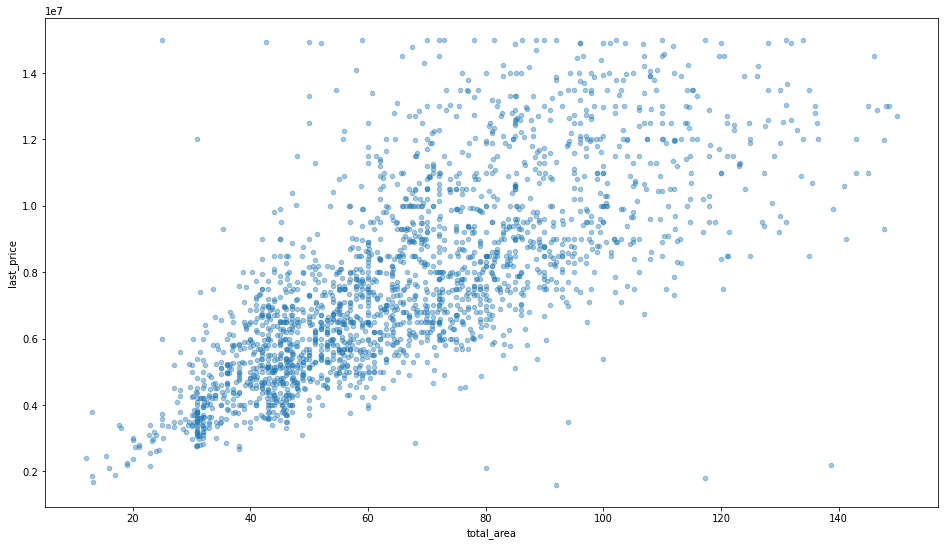

In [86]:
df.query('dist_to_center_km <= 8').plot(
    x='total_area', y='last_price', kind='scatter',
    figsize=(16, 9), alpha=0.4)
#диаграмма рассеяния, по х - общая площадь, по у - цена квартиры

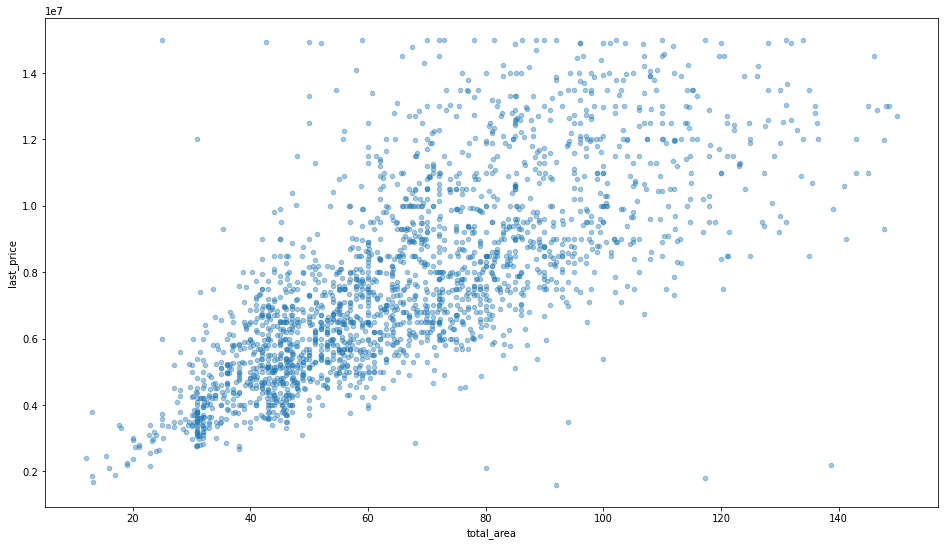

In [87]:
df.query('dist_to_center_km <= 8').plot(
    x='total_area', y='last_price',
    kind='scatter', figsize=(16, 9), alpha=0.4)
#диаграмма рассеяния, по х - общая площадь, по у - цена за метр

Один в один как для общей базы. Рассмотрим зависимость итоговой цены и цены за метр от количества комнат

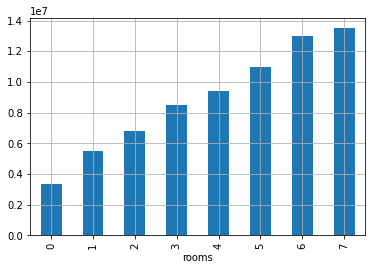

In [88]:
df.query('dist_to_center_km <= 8').pivot_table(
    index='rooms', values='last_price',  
    aggfunc=['median']).plot(kind='bar', grid=True, legend=False)
#по х - количество комнат, по у - медианное значение итоговой цены

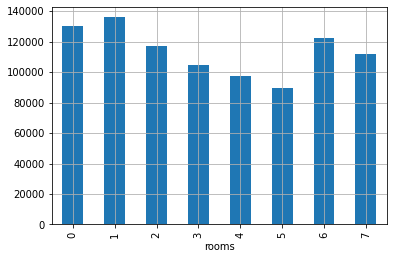

In [89]:
df.query('dist_to_center_km <= 8').pivot_table(
    index='rooms', values='price_per_meter',
    aggfunc=['median']).plot(kind='bar', grid=True, legend=False)
#по х - количество комнат, по у - медианное значение цены за метр

Снова ничего нового. Зависимость цены за метр от количества комнат 1-3 более ярко выражена. Рассмотрим зависимость итоговой цены и цены за метр от расстояния до центра.

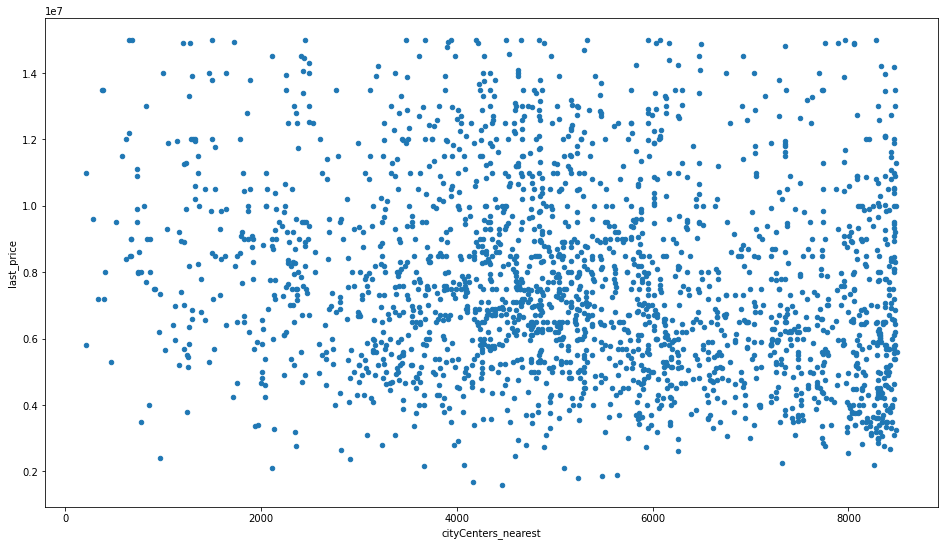

In [90]:
df.query('dist_to_center_km <= 8').plot(
    x='cityCenters_nearest', y='last_price',
    kind='scatter', figsize=(16, 9), alpha=1);
#диаграмма рассеяния, по х - расстояние до центра, по у - цена квартиры

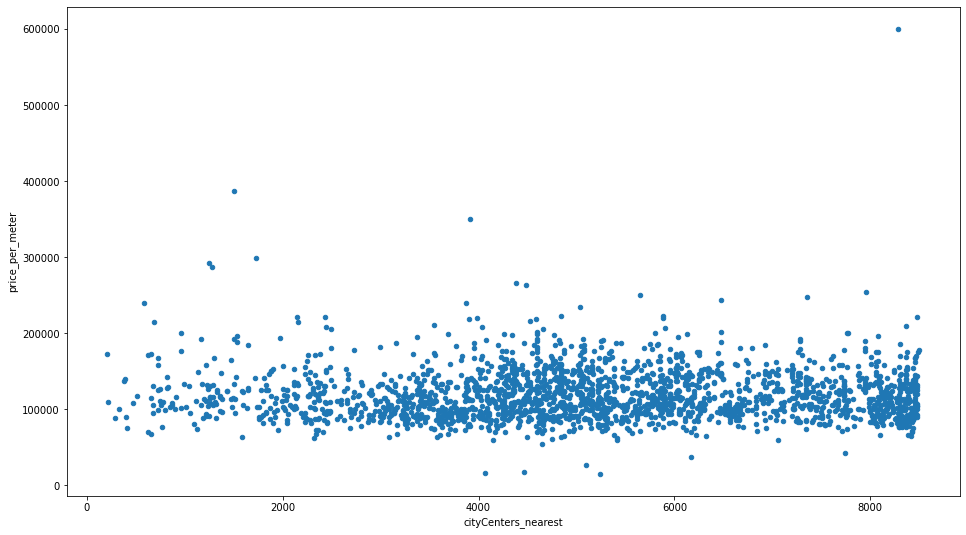

In [91]:
df.query('dist_to_center_km <= 8').plot(
    x='cityCenters_nearest', y='price_per_meter',
    kind='scatter', figsize=(16, 9), alpha=1);
#диаграмма рассеяния, по х - расстояние до центра, по у - цена за метр

А вот здесь совсем ничего не видно, потому что мы уже и так находимся в центре. Посмотрим на зависимость цен от этажа, на котором располагается квартира.

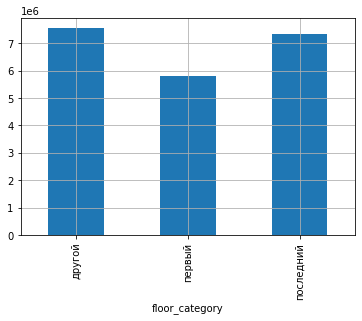

In [92]:
df.query('dist_to_center_km <= 8').pivot_table(
    index='floor_category', values='last_price',
    aggfunc=['median']).plot(kind='bar', grid=True, legend=False)
#по х - этаж, по у - итоговая цена

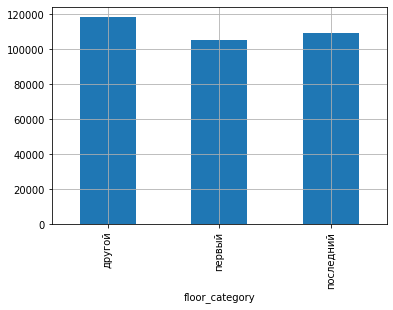

In [93]:
df.query('dist_to_center_km <= 8').pivot_table(
    index='floor_category', values='price_per_meter',
    aggfunc=['median']).plot(kind='bar', grid=True, legend=False)

Итоговая цена на первых этажах проседает значительнее, чем для общей базы. В свою очередь, цена за метр на первом и последнем этажах отличаются меньше друг от друга, но по-преждему проигрывают ценам на других этажах. Последнее, посмотрим, есть ли зависимость цен от дня недели, месяца, года размещения объявления.

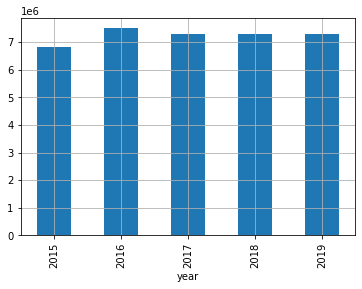

In [94]:
df.query('dist_to_center_km <= 8').pivot_table(
    index='year', values='last_price',
    aggfunc=['median']).plot(kind='bar', grid=True, legend=False)
#по х - год объявления, по у - медианное значение итоговой цены

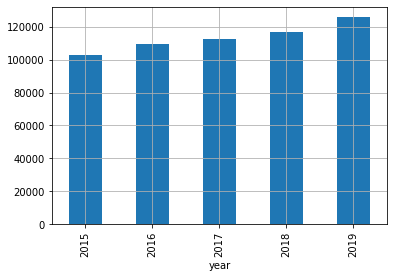

In [95]:
df.query('dist_to_center_km <= 8').pivot_table(
    index='year', values='price_per_meter',
    aggfunc=['median']).plot(kind='bar', grid=True, legend=False)
#по х - год объявления, по у - медианное значение цены за метр

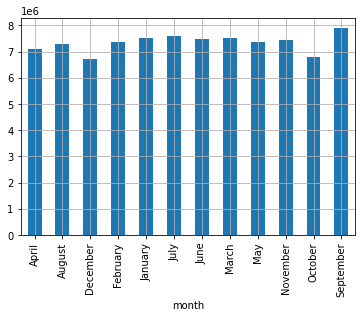

In [96]:
df.query('dist_to_center_km <= 8').pivot_table(
    index='month', values='last_price',
    aggfunc=['median']).plot(kind='bar', grid=True, legend=False)
#по х - месяц объявления, по у - медианное значение итоговой цены

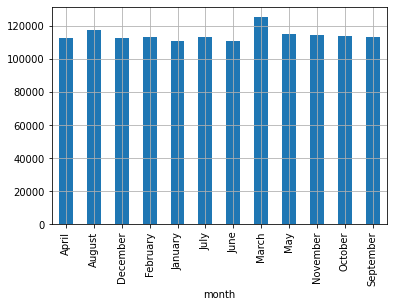

In [97]:
df.query('dist_to_center_km <= 8').pivot_table(
    index='month', values='price_per_meter',
    aggfunc=['median']).plot(kind='bar', grid=True, legend=False)
#по х - месяц объявления, по у - медианное значение цены за метр

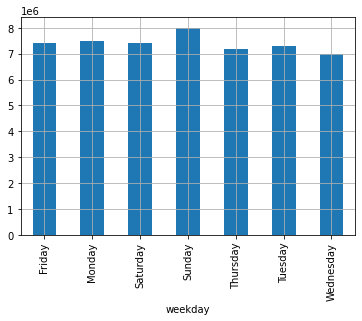

In [98]:
df.query('dist_to_center_km <= 8').pivot_table(
    index='weekday', values='last_price',
    aggfunc=['median']).plot(kind='bar', grid=True, legend=False)
#по х - день недели, по у - медианное значение итоговой цены

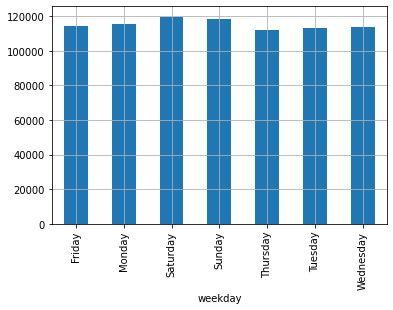

In [99]:
df.query('dist_to_center_km <= 8').pivot_table(
    index='weekday', values='price_per_meter', 
    aggfunc=['median']).plot(kind='bar', grid=True, legend=False)
#по х - день недели, по у - медианное значение цены за метр

По-прежнему видим тренд на увеличение цены за квадратный метр с годами, Зависимости от месяца или дня недели по-прежнему не наблюдается (либо она незначительная).

**Вывод**: Параметры продаваемых квартир в центре отличаются от общей базы значительно. Закономерности ценообразования для сегмента квартир в центре совпадают с общей базой. Чуть лучше прослеживается зависимость цены метра от общей площади. В свою очередь, графики зависимости цен от столбца `cityCenters_nearest` - расстояния до центра в метрах, дают шум и непригодны для анализа.

## Общий вывод

Мы проанализировали датасет объявлений о продаже квартир в Петербурге и области. Большая часть выявленных закономерностей и так была интуитивно ясна, однако была подтверждена сравнением значений и построением графиков. Кратко еще раз обозначим отмеченные закономерности:
1. Итоговая цена квартиры зависит от ее площади и количества комнат.
2. Цена квадратного метра растет с годами
3. Зависимость цены от дня размещения объявления и месяца отсутствует (либо очень плохо выражена)
4. Квартиры на первых и последних этажах дешевле, чем на остальных.
5. Чем ближе квартира к центру, тем выше итоговая цена и цена за метр.
6. Центральный сегмент квартир имеет радиус около восьми километров.
7. Средние показатели квартир центрального сегмента отличаются от общей выборки.
8. Закономерности ценообразования для центрального сегмента совпадают с общей базой.